In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
data = pd.read_csv('../datasets/input.csv')
target = pd.read_csv('../datasets/target.csv')

In [4]:
datasets = pd.merge(data, target, on=('국가별', '시점'), how='outer')
datasets.dropna(inplace=True)
datasets.reset_index(inplace=True)
datasets.drop(['국가별', 'index'], axis=1, inplace=True)
datasets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1261 entries, 0 to 1260
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   시점        1261 non-null   int64  
 1   인당_GDP    1261 non-null   float64
 2   부채비율      1261 non-null   float64
 3   실업률       1261 non-null   float64
 4   상품및서비스수입  1261 non-null   float64
 5   상품및서비스수출  1261 non-null   float64
 6   정치적안정성    1261 non-null   int64  
 7   규제의질      1261 non-null   int64  
 8   경상수지      1261 non-null   float64
 9   신용등급점수    1261 non-null   float64
dtypes: float64(7), int64(3)
memory usage: 98.6 KB


In [5]:
lb = LabelEncoder()
datasets['시점'] = lb.fit_transform(datasets['시점'])
datasets.describe()

,시점,인당_GDP,부채비율,실업률,상품및서비스수입,상품및서비스수출,정치적안정성,규제의질,경상수지,신용등급점수
count,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000
mean,7.505155,22012.779330,55.695265,7.113140,4.170044,3.660556,54.612213,67.015860,-1.326674,12.526324
std,4.603761,22939.181148,37.783440,4.499929,10.071854,9.109875,27.897707,23.512842,7.070186,5.288810
min,0.000000,333.731576,-3.400000,0.210000,-50.275895,-56.736571,0.000000,6.000000,-41.526871,0.000000
25%,4.000000,4379.658787,30.300000,4.120000,0.200224,0.259701,29.000000,48.000000,-4.754963,8.000000
50%,8.000000,12808.038340,47.100000,6.120000,4.560764,4.075288,58.000000,70.000000,-1.742977,12.500000
75%,11.000000,36323.447740,70.780000,8.480000,9.093538,7.668103,79.000000,88.000000,2.367691,17.000000
max,15.000000,123514.196700,266.200000,31.110000,66.893243,86.043298,100.000000,100.000000,27.397650,20.000000


In [6]:
x_train, x_test, y_train, y_test = train_test_split(datasets.iloc[:,:9], datasets.iloc[:,9], test_size=0.2, random_state=42)

In [7]:
lr = LinearRegression()
lr.fit(x_train, y_train)
pred = lr.predict(x_test)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, pred)
print(f'mse : {mse} \nrmse : {rmse} \nr2 : {r2} \ncoef : {lr.coef_} \nintercept : {lr.intercept_}')

mse : 4.024385365938957 
rmse : 2.0060870783540175 
r2 : 0.8551038326932417 
coef : [-6.61409768e-02  5.16852468e-05 -1.49020928e-02 -1.09543862e-01
  7.03591420e-03 -1.99963816e-02 -9.87482198e-03  1.65137757e-01
  8.82065386e-02] 
intercept : 3.091872620663473


<AxesSubplot:>

d:\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


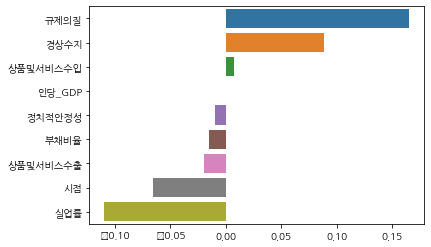

In [8]:
coef_ = pd.Series(lr.coef_, index=x_train.columns)
coef_sort = coef_.sort_values(ascending=False)
plt.rcParams['font.family'] = 'NanumGothic'
sns.barplot(x=coef_sort.values, y=coef_sort.index)


In [9]:
ss = StandardScaler()
x_train_ss = ss.fit_transform(x_train)
x_test_ss = ss.fit_transform(x_test)


lr = LinearRegression()
lr.fit(x_train_ss, y_train)
pred = lr.predict(x_test_ss)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, pred)
print(f'mse : {mse} \nrmse : {rmse} \nr2 : {r2} \ncoef : {lr.coef_} \nintercept : {lr.intercept_}')

mse : 4.018426678911476 
rmse : 2.0046013765613044 
r2 : 0.855318372513352 
coef : [-0.3038611   1.18415816 -0.56101258 -0.49877913  0.07068181 -0.1875236
 -0.27712522  3.87761809  0.60895097] 
intercept : 12.526770833333334


<AxesSubplot:>

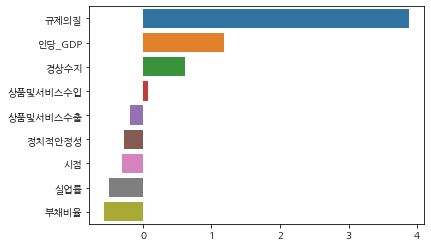

In [10]:
coef_ = pd.Series(lr.coef_, index=x_train.columns)
coef_sort = coef_.sort_values(ascending=False)
plt.rcParams['font.family'] = 'NanumGothic'
sns.barplot(x=coef_sort.values, y=coef_sort.index)


In [11]:
datasets = pd.merge(data, target, on=('국가별', '시점'), how='outer')
datasets.dropna(inplace=True)
datasets.reset_index(inplace=True)
datasets.drop(['국가별', 'index'], axis=1, inplace=True)
datasets.info()
datasets.drop('시점', inplace=True, axis=1)
x_train, x_test, y_train, y_test = train_test_split(datasets.iloc[:,:8], datasets.iloc[:,8], test_size=0.2, random_state=42)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1261 entries, 0 to 1260
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   시점        1261 non-null   int64  
 1   인당_GDP    1261 non-null   float64
 2   부채비율      1261 non-null   float64
 3   실업률       1261 non-null   float64
 4   상품및서비스수입  1261 non-null   float64
 5   상품및서비스수출  1261 non-null   float64
 6   정치적안정성    1261 non-null   int64  
 7   규제의질      1261 non-null   int64  
 8   경상수지      1261 non-null   float64
 9   신용등급점수    1261 non-null   float64
dtypes: float64(7), int64(3)
memory usage: 98.6 KB


In [12]:
lr = LinearRegression()
lr.fit(x_train, y_train)
pred = lr.predict(x_test)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, pred)
print(f'mse : {mse} \nrmse : {rmse} \nr2 : {r2} \ncoef : {lr.coef_} \nintercept : {lr.intercept_}')

mse : 4.120709321561436 
rmse : 2.0299530343240546 
r2 : 0.8516357324194334 
coef : [ 5.04832369e-05 -1.59906770e-02 -1.07798353e-01  1.25400671e-02
 -1.71055016e-02 -9.30305499e-03  1.66055701e-01  8.54859120e-02] 
intercept : 2.5456798559740736


<AxesSubplot:>

d:\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


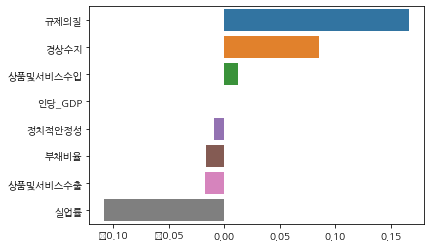

In [13]:
coef_ = pd.Series(lr.coef_, index=x_train.columns)
coef_sort = coef_.sort_values(ascending=False)
plt.rcParams['font.family'] = 'NanumGothic'
sns.barplot(x=coef_sort.values, y=coef_sort.index)


In [14]:
ss = StandardScaler()
x_train_ss = ss.fit_transform(x_train)
x_test_ss = ss.fit_transform(x_test)


lr = LinearRegression()
lr.fit(x_train_ss, y_train)
pred = lr.predict(x_test_ss)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, pred)
print(f'mse : {mse} \nrmse : {rmse} \nr2 : {r2} \ncoef : {lr.coef_} \nintercept : {lr.intercept_}')

mse : 4.124261710950005 
rmse : 2.0308278388258336 
r2 : 0.8515078302529209 
coef : [ 1.15661897 -0.60199403 -0.49083141  0.12597575 -0.16041329 -0.26107926
  3.89917243  0.5901686 ] 
intercept : 12.526770833333334


<AxesSubplot:>

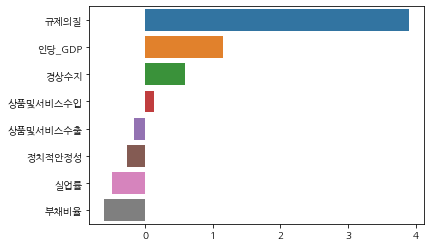

In [15]:
coef_ = pd.Series(lr.coef_, index=x_train.columns)
coef_sort = coef_.sort_values(ascending=False)
plt.rcParams['font.family'] = 'NanumGothic'
sns.barplot(x=coef_sort.values, y=coef_sort.index)